### Calculating the total cross section for neutrino-nucleon DIS

In [1]:
# Libraries

import numpy as np
from scipy.integrate import dblquad
import lhapdf
from matplotlib import pyplot as plt

LHAPDF 6.5.4 loading /Users/francescomontagno2/miniconda3/envs/lhapdf-muc/share/LHAPDF/MSHT20nnlo_as118/MSHT20nnlo_as118_0000.dat
MSHT20nnlo_as118 PDF set, member #0, version 4; LHAPDF ID = 27400


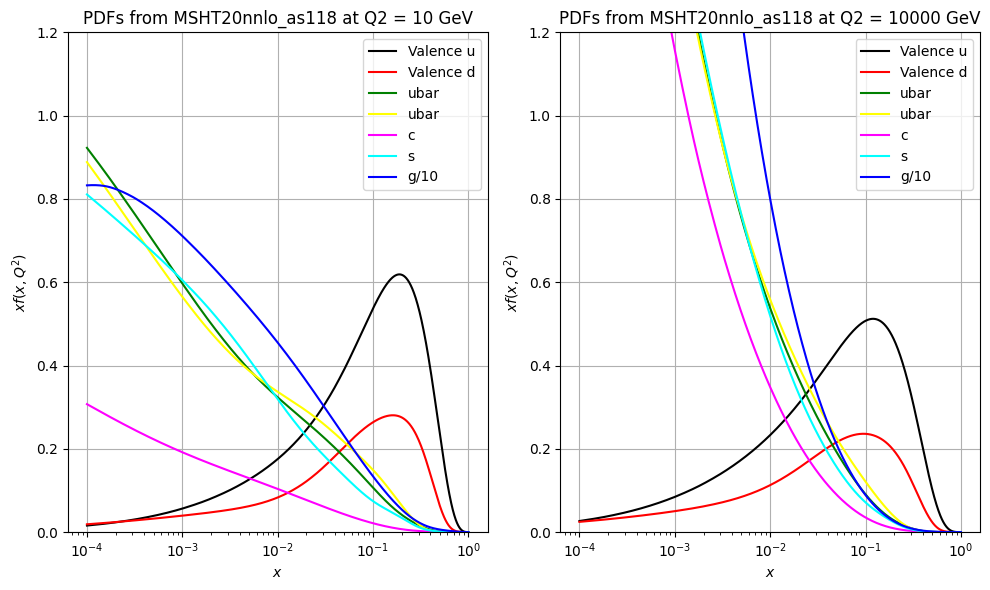

In [2]:
#  PDFs

pdf_set_name = "MSHT20nnlo_as118"
pdf = lhapdf.mkPDF(pdf_set_name, 0)

xs = np.logspace(-4, 0, 1000)  
Q2_values = [10, 10000]  

flavors = {
    "u (up)": 2,
    "d (down)": 1,
    "s (strange)": 3,
    "c (charm)": 4,
    "ubar (antiup)": -2,
    "dbar (antidown)": -1,
    "gluon (gluon/10)": 21
}

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

for i, Q2 in enumerate(Q2_values):
    ax = axs[ i % 2]  
    
    u       = np.array([pdf.xfxQ2(2,x,Q2) for x in xs])
    ubar    = np.array([pdf.xfxQ2(-2,x,Q2) for x in xs])
    d       = np.array([pdf.xfxQ2(1,x,Q2) for x in xs])
    dbar    = np.array([pdf.xfxQ2(-1,x,Q2) for x in xs])
    c       = np.array([pdf.xfxQ2(4,x,Q2) for x in xs])
    s       = np.array([pdf.xfxQ2(3,x,Q2) for x in xs])
    g       = np.array([pdf.xfxQ2(21,x,Q2) for x in xs])
    
    ax.plot(xs,u-ubar,label='Valence u',color='black' )
    ax.plot(xs,d-dbar,label='Valence d',color='red' )
    ax.plot(xs,ubar,label='ubar',color='green' )
    ax.plot(xs,dbar,label='ubar',color='yellow' )
    ax.plot(xs,c,label='c',color='magenta' )
    ax.plot(xs,s,label='s',color='#00FFFF' )
    ax.plot(xs,g/10,label='g/10' ,color='blue')
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$x f(x, Q^2)$")
    ax.set_title(f"PDFs from {pdf_set_name} at Q2 = {Q2} GeV")
    ax.legend()
    ax.set_ylim(0,1.2)
    ax.grid(True)

plt.tight_layout()

plt.show()


#### Reference : Okun - Leptons and quarks Chapter 17. Neutrino-nucleon interactions



In [3]:
# Physical Consts

G_F = 1.1663787e-5  # Fermi coupling constant (GeV^-2)

##### Here we are considering nu p -> mu X

In [4]:
# dsigma / dx dy
# Reference : chapter 17 Okun, their notation is u(x) = x f(x)
def dsigma_dxdy(s, x, y):
    
    Q2      = x * y * s
    fd      = pdf.xfxQ2(1, x, Q2) 
    fubar   = pdf.xfxQ2(-2,x,Q2) 
    dsigma  = G_F**2 * s / np.pi * ( fd + fubar * (1-y)**2)  
    return dsigma

In [5]:
# Calculating the Cross Section


# Invariant mass
invariant_mass = 300  # GeV 

# Integration Regions
x_min, x_max = 1e-4, 1.0
y_min, y_max = 0., 1.0

def integrand(x, y):
    return dsigma_dxdy(invariant_mass ** 2, x, y)


# Double Integral 
sigma_total, error = dblquad(
    integrand,          # Integrand
    y_min,              # Inferior limit for y
    y_max,              # Superior limit for y
    lambda y: x_min,    # Inferior limit for x
    lambda y: x_max,    # Superior limit for x
    epsabs=1e-11,        # Absolute Error
    #epsrel=1e-13         # Relative Error
)


print(f"total cross section at invariant mass = {invariant_mass} GeV : {sigma_total:.6e} ± {error:.6e}")



total cross section at invariant mass = 300 GeV : 4.694266e-07 ± 9.934272e-12


total cross section at invariant mass = 10.0 GeV : 5.981900e-10 ± 4.919145e-10
total cross section at invariant mass = 30.0 GeV : 5.140849e-09 ± 5.534226e-09
total cross section at invariant mass = 100.0 GeV : 5.427730e-08 ± 1.257157e-08
total cross section at invariant mass = 300.0 GeV : 4.694625e-07 ± 1.339730e-08
total cross section at invariant mass = 1000.0 GeV : 5.035041e-06 ± 1.447277e-08
total cross section at invariant mass = 3000.0 GeV : 4.409528e-05 ± 1.468806e-08
total cross section at invariant mass = 10000.0 GeV : 4.773885e-04 ± 1.489956e-08
total cross section at invariant mass = 30000.0 GeV : 4.207383e-03 ± 1.489894e-08


Text(0, 0.5, 'Cross Section')

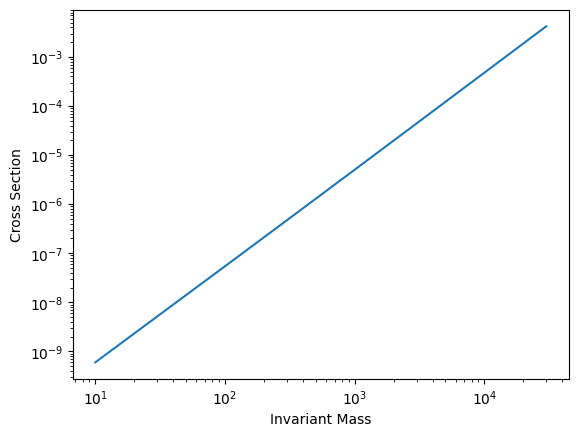

In [6]:
# Plotting x sec for different Invariant Mass values

inv_mass = np.array([10,30,100,300,1000,3000,1e4,3e4]) # GeV
xsec     = np.array([0.]*len(inv_mass))

for i in range(len(inv_mass)):

    invariant_mass = inv_mass[i]   
    def integrand(x, y):
        return dsigma_dxdy(invariant_mass ** 2, x, y)


    # Double Integral 
    sigma_total, error = dblquad(
        integrand,          # Integrand
        y_min,              # Inferior limit for y
        y_max,              # Superior limit for y
        lambda y: x_min,    # Inferior limit for x
        lambda y: x_max,    # Superior limit for x
        #epsabs=1e-11,        # Absolute Error
        #epsrel=1e-11         # Relative Error
    )


    print(f"total cross section at invariant mass = {invariant_mass} GeV : {sigma_total:.6e} ± {error:.6e}")
    xsec[i] = sigma_total

plt.plot(inv_mass,xsec)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Invariant Mass')
plt.ylabel('Cross Section')